In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [ ]:
df=pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.shape

(299, 13)

In [ ]:
col=df.columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
VC_DE=df["DEATH_EVENT"].value_counts()
VC_DE

0    203
1     96
Name: DEATH_EVENT, dtype: int64

<Axes: >

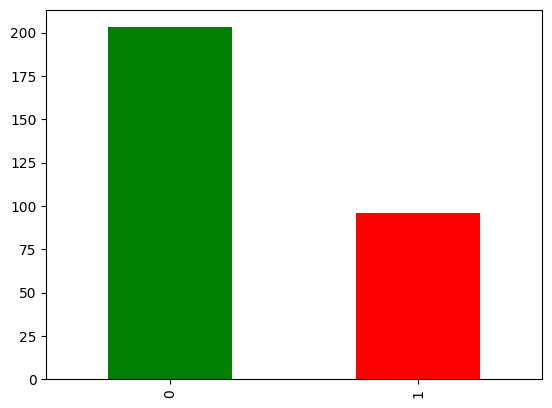

In [ ]:
VC_DE.plot(kind='bar',color=['green','red'])

<ipython-input-12-b46f8ef51b3e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age)


<Axes: xlabel='age', ylabel='Density'>

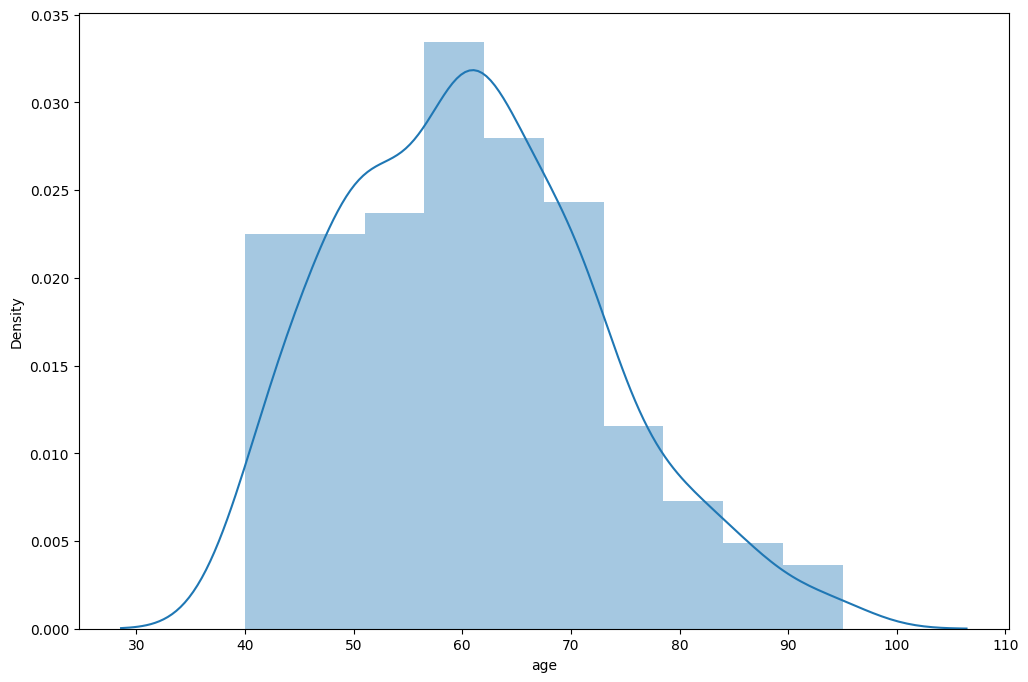

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(df.age)

In [ ]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

<ipython-input-14-2c6be95b8c40>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)
<ipython-input-14-2c6be95b8c40>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)
<ipython-input-14-2c6be95b8c40>:11: UserWarning: 

`distplot` is a deprecated function a

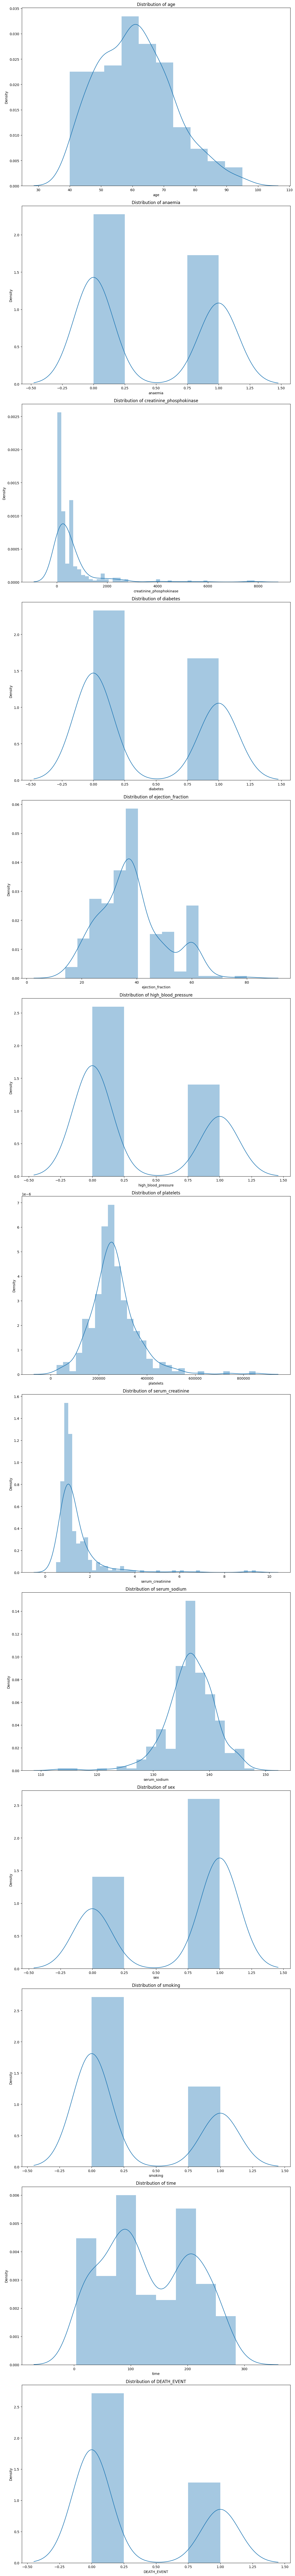

In [ ]:

columns_to_plot = df.columns

num_rows = len(columns_to_plot)
num_cols = 1

plt.figure(figsize=(12, 8*num_rows))

# Create distplots for each column using a for loop
for i, column in enumerate(columns_to_plot):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.distplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
import matplotlib.ticker as mtick

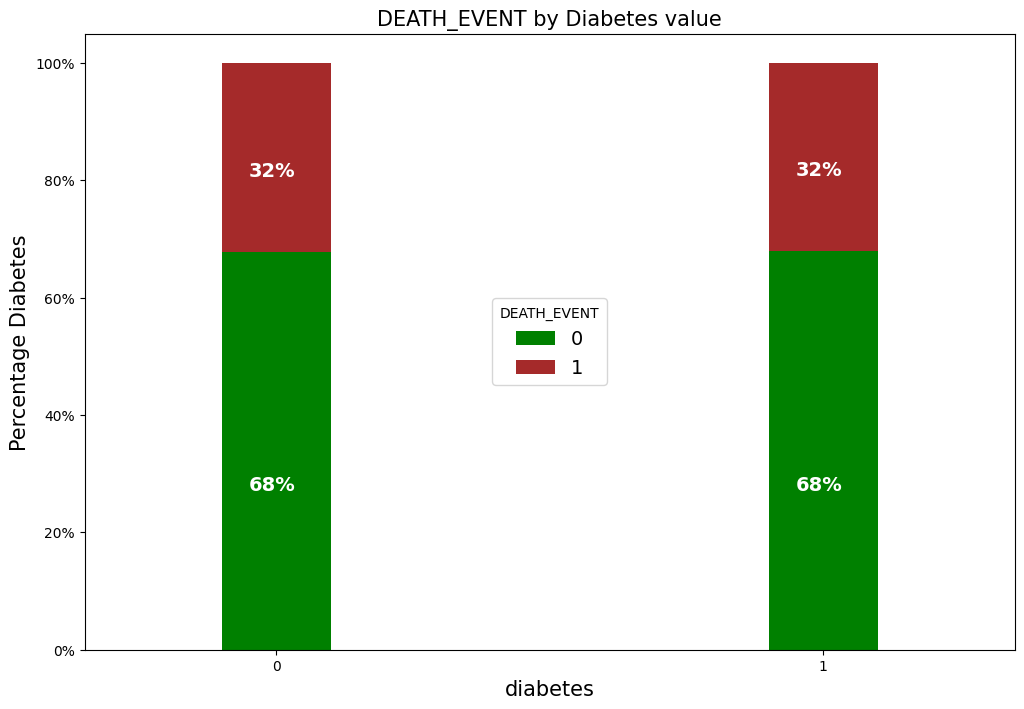

In [ ]:
colors = ['green','brown']
Diabetes_label = df.groupby(['diabetes','DEATH_EVENT']).size().unstack()
ax = (Diabetes_label.T*100.0 / Diabetes_label.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (12,8),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'DEATH_EVENT')
ax.set_ylabel('Percentage Diabetes', fontsize = 15)
ax.set_xlabel('diabetes',  fontsize = 15)
ax.set_title('DEATH_EVENT by Diabetes value', fontsize = 15)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

In [ ]:
discrete_features = [feature for feature in df.columns if df[feature].dtype == 'int64' and len(df[feature].unique())<100]
continuous_features = [feature for feature in df.columns if df[feature].dtype == 'float64' or feature not in discrete_features]


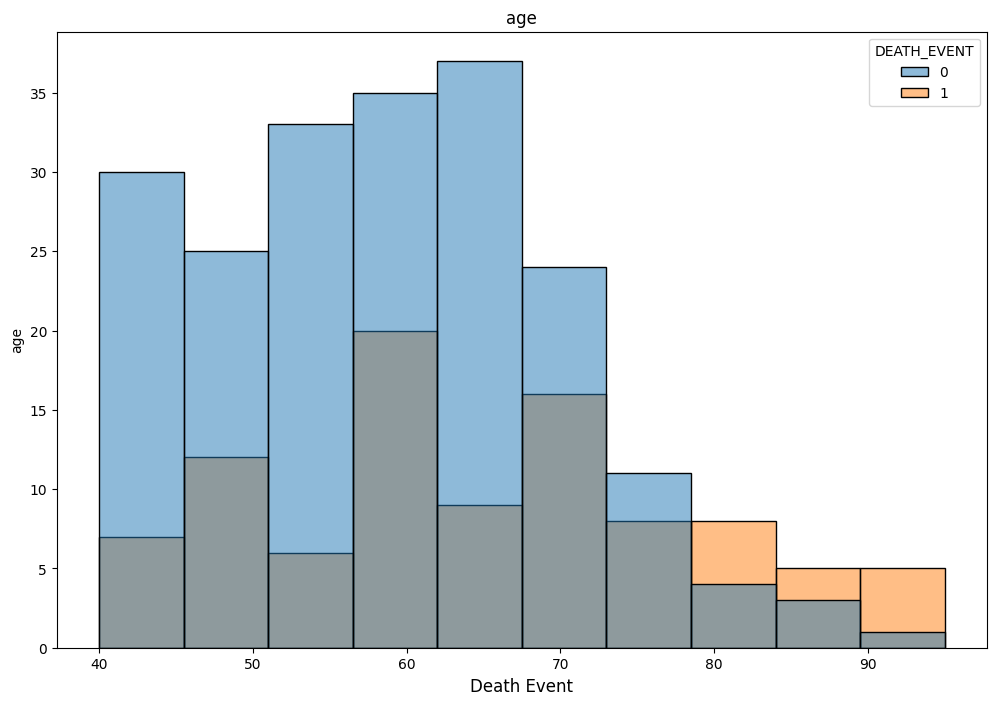

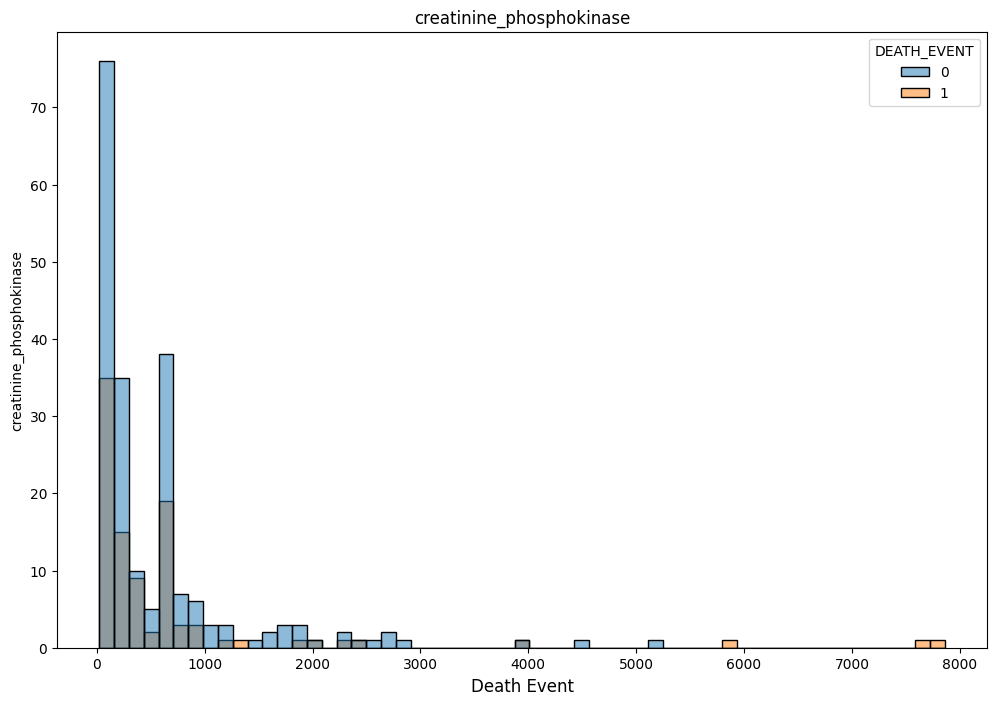

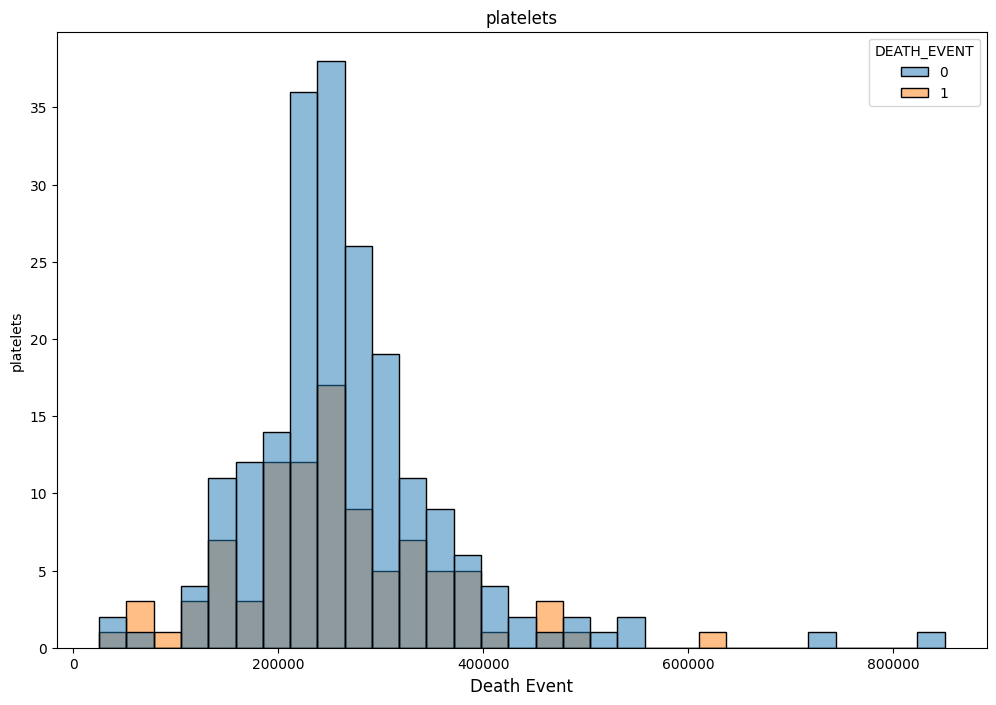

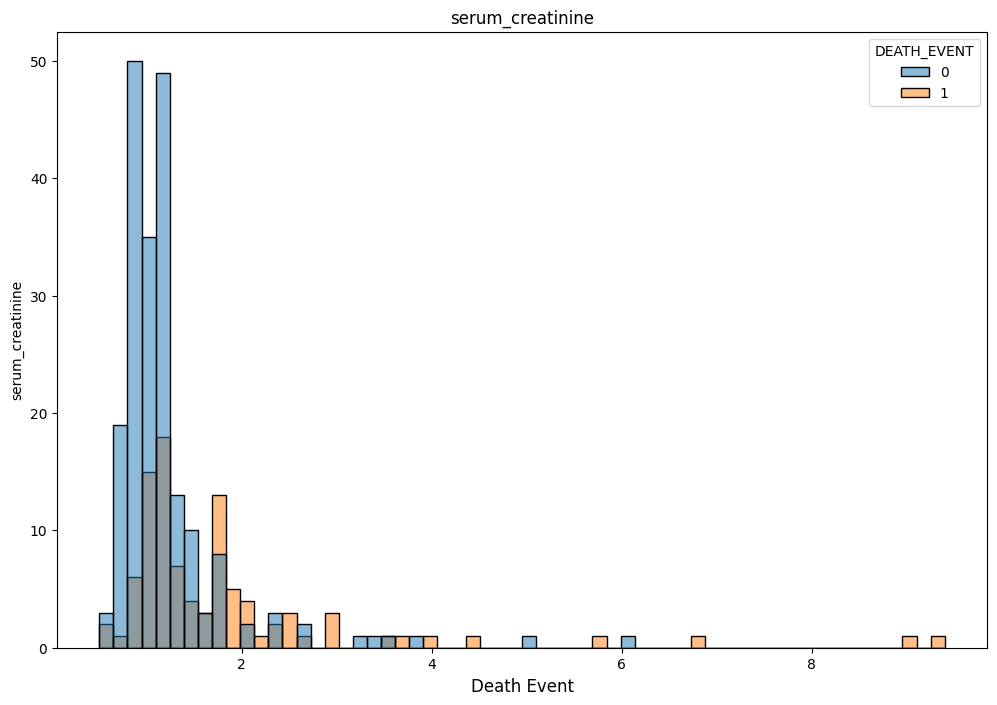

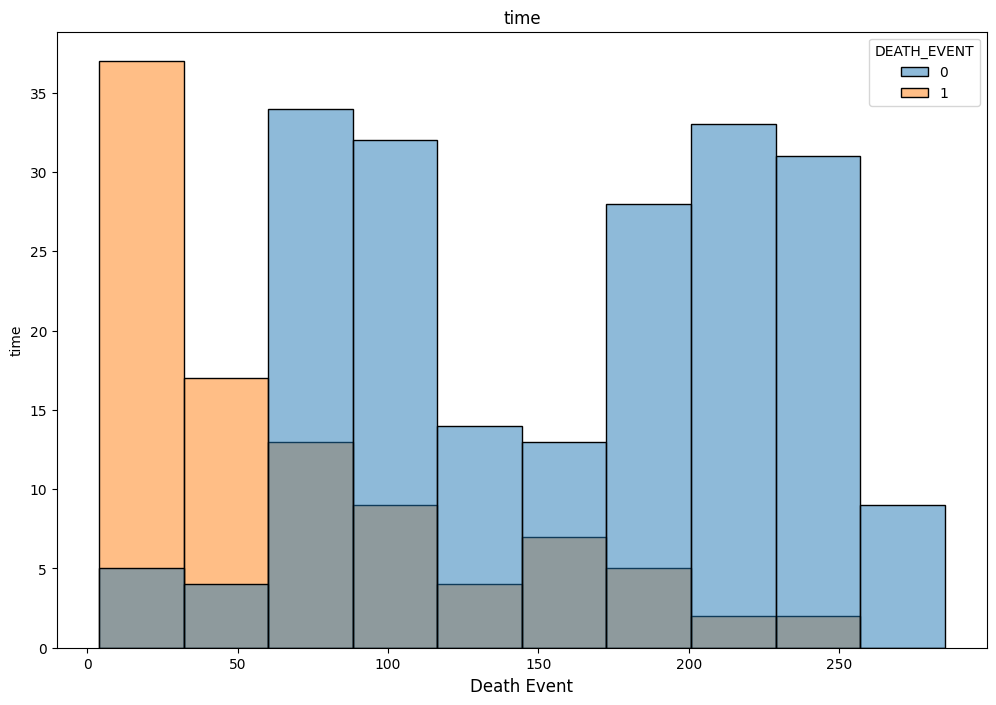

In [ ]:
for feature in continuous_features:
    plt.figure(figsize = (12,8))
    sns.histplot(x=feature, data=df, hue='DEATH_EVENT', )
    plt.title(feature)
    plt.xlabel('Death Event', fontsize = 12)
    plt.ylabel(feature)
    plt.show()

In [ ]:
df[df.columns][1:].corr()["DEATH_EVENT"][:]

age                         0.249388
anaemia                     0.070863
creatinine_phosphokinase    0.062951
diabetes                    0.002204
ejection_fraction          -0.263102
high_blood_pressure         0.073205
platelets                  -0.049397
serum_creatinine            0.293045
serum_sodium               -0.189254
sex                        -0.007942
smoking                    -0.009308
time                       -0.523200
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64

In [ ]:
df.corr()['DEATH_EVENT']

age                         0.253729
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
ejection_fraction          -0.268603
high_blood_pressure         0.079351
platelets                  -0.049139
serum_creatinine            0.294278
serum_sodium               -0.195204
sex                        -0.004316
smoking                    -0.012623
time                       -0.526964
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64

<Axes: >

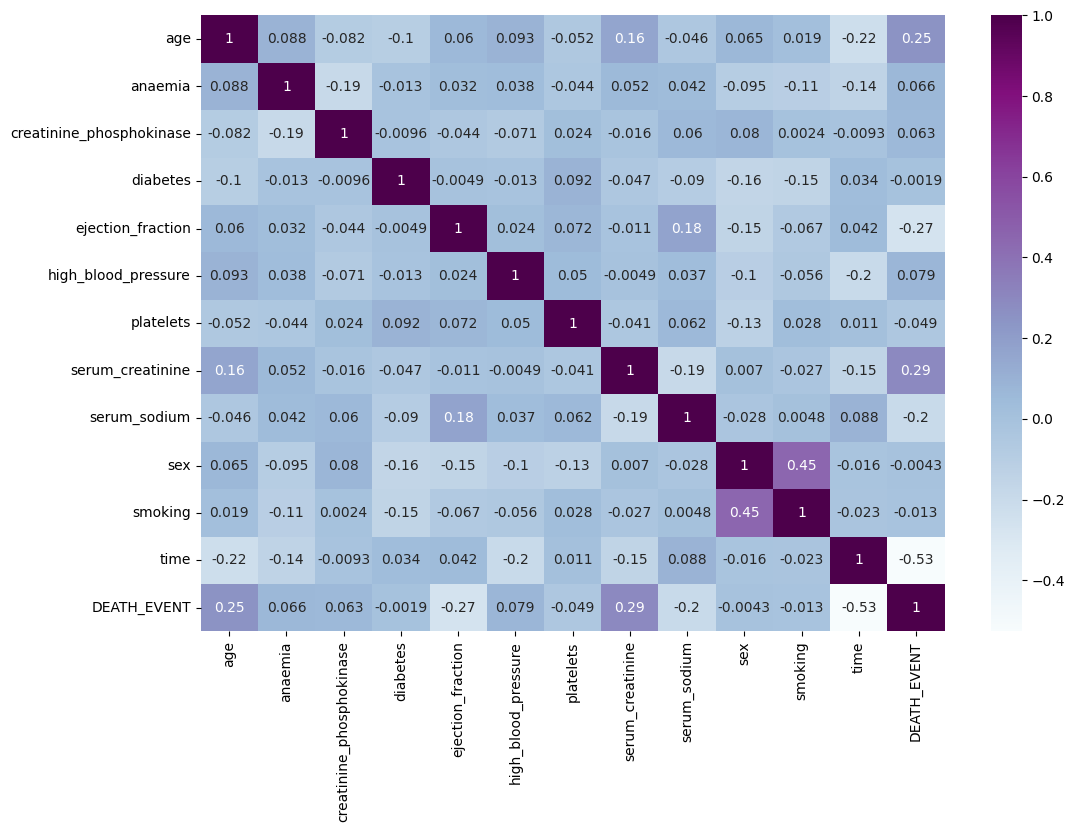

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='BuPu')

In [ ]:
x=df.drop('DEATH_EVENT',axis=1)
y=df['DEATH_EVENT']

In [ ]:
x

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [ ]:
# using smote
from imblearn.over_sampling import SMOTE
s=SMOTE()
x,y=s.fit_resample(x,y)


In [ ]:
x.shape

(406, 12)

In [ ]:
y.shape

(406,)

In [ ]:
from collections import Counter
print(Counter(y))

Counter({1: 203, 0: 203})


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x_test.shape)

(82, 12)


In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
#x_test = scaler.transform(x_test)

In [ ]:
x_test=scaler.transform(x_test)

In [ ]:
print(x_train)

[[-0.86739018 -0.80812204 -0.47489245 ...  0.87227838  1.70399955
  -0.02312526]
 [-1.03752559  1.23743687 -0.02161612 ... -1.14642301 -0.58685462
   0.96344258]
 [-0.18684852  1.23743687  0.15163616 ...  0.87227838 -0.58685462
  -0.30309721]
 ...
 [ 1.93984417 -0.80812204  5.31697173 ...  0.87227838  1.70399955
  -0.55640516]
 [ 1.68464105  1.23743687 -0.22609411 ...  0.87227838 -0.58685462
  -1.34299303]
 [ 0.23849002 -0.80812204 -0.02161612 ... -1.14642301 -0.58685462
   0.35017068]]


In [ ]:

lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [ ]:
print(y_pred)

[1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0
 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 0 0 0 1 0]


In [ ]:
accu_lg = accuracy_score(y_pred, y_test)


In [ ]:
accu_lg

0.8292682926829268

In [ ]:
from sklearn.metrics import recall_score

recall_lg = recall_score(y_test, y_pred)
print(f'Recall: {recall_lg}')

Recall: 0.7674418604651163


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
Dt_classifier = DecisionTreeClassifier(max_depth = 3)

Dt_classifier.fit(x_train, y_train)

y_pred_dt = Dt_classifier.predict(x_test)

In [ ]:
accu_dt = accuracy_score(y_pred_dt, y_test)

In [ ]:
accu_dt

0.7926829268292683

In [ ]:
recall_dt = recall_score(y_test, y_pred_dt)
print(f'Recall: {recall_dt}')

Recall: 0.8604651162790697


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
Rf_classifier = RandomForestClassifier(n_estimators = 100)

Rf_classifier.fit(x_train, y_train)

y_pred_rf = Rf_classifier.predict(x_test)

accu_rf = accuracy_score(y_pred_rf, y_test)

# Print the prediction accuracy
print('Test Accuracy Random Forest Classifier :', accu_rf)

Test Accuracy Random Forest Classifier : 0.8780487804878049


In [ ]:
recall_rf = recall_score(y_test, y_pred_rf)
print(f'Recall: {recall_rf}')

Recall: 0.8837209302325582


In [ ]:
Rf_Svc = SVC(C = 0.01)

Rf_Svc.fit(x_train, y_train)

y_pred_svc = Rf_Svc.predict(x_test)

In [ ]:
accu_svc = accuracy_score(y_pred_svc, y_test)

# Print the prediction accuracy
print('Test Accuracy Support Vector Machine Classifier :', accu_svc)

Test Accuracy Support Vector Machine Classifier : 0.47560975609756095


In [ ]:
recall_svc = recall_score(y_test, y_pred_svc)
print(f'Recall: {recall_svc}')

Recall: 0.0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
Knn_classifier = KNeighborsClassifier(n_neighbors=100)

Knn_classifier.fit(x_train, y_train)

y_pred_knn = Knn_classifier.predict(x_test)

In [ ]:
accu_knn = accuracy_score(y_pred_knn, y_test)

# Print the prediction accuracy
print('Test accuracy K-nearest Neighbour Classifier :', accu_knn)

Test accuracy K-nearest Neighbour Classifier : 0.7804878048780488


In [ ]:
recall_knn = recall_score(y_test, y_pred_knn)
print(f'Recall: {recall_knn}')

Recall: 0.7209302325581395


In [ ]:
print("Random forest recall : ", recall_rf)

Random forest recall :  0.8837209302325582
